In [1]:
from utils.all import *

# There's also 'tutorial' and 'preliminary' data
data = load_data('../annotated', batch_num=[5, 6, 7, 8, 9], preprocess=True)
systems = set([x['system'] for x in data])
edit_types = set(data[0]['annotations'].keys())

# TODO: trivial edits on substitutions aren't being processed correctly

Loading files: ['../annotated/batch_5_anton.json', '../annotated/batch_5_ayush.json', '../annotated/batch_5_kelly.json', '../annotated/batch_5_rachel.json', '../annotated/batch_5_vinayak.json', '../annotated/batch_5_vishnesh.json', '../annotated/batch_6_anton.json', '../annotated/batch_6_ayush.json', '../annotated/batch_6_kelly.json', '../annotated/batch_6_rachel.json', '../annotated/batch_6_vinayak.json', '../annotated/batch_6_vishnesh.json', '../annotated/batch_7_anton.json', '../annotated/batch_7_ayush.json', '../annotated/batch_7_kelly.json', '../annotated/batch_7_rachel.json', '../annotated/batch_7_vinayak.json', '../annotated/batch_7_vishnesh.json', '../annotated/batch_8_ayush.json', '../annotated/batch_8_kelly.json', '../annotated/batch_8_rachel.json', '../annotated/batch_8_vinayak.json', '../annotated/batch_8_vishnesh.json', '../annotated/batch_9_kelly.json']

Found users: {'ayush', 'rachel', 'kelly', 'vishnesh', 'vinayak', 'anton'}

anton - Batch 5, HIT 38 (ID 37) has 2 deleti

In [18]:
# Find an example sentence
for sent in data:
    if 'GPT-3-few-shot' not in sent['system']:
        continue 

    errors = [a for a in sent['processed_annotations'] if a['error_type'] is not None]

    # Aim for 2-4 errors
    if len(errors) < 2:
        continue

    # Exclude longer sentences
    if len(sent['original']) > 200:
        continue

    print(get_sent_info(sent))

# Our Winner is: anton - Batch 7, HIT 23 (ID 170)

vinayak - Batch 7, HIT 2 (ID 154)
vishnesh - Batch 7, HIT 18 (ID 165)
anton - Batch 7, HIT 23 (ID 170)
vishnesh - Batch 7, HIT 31 (ID 170)
vishnesh - Batch 7, HIT 48 (ID 215)
rachel - Batch 7, HIT 27 (ID 246)
vishnesh - Batch 8, HIT 4 (ID 246)
vishnesh - Batch 8, HIT 10 (ID 251)
vishnesh - Batch 8, HIT 23 (ID 257)
rachel - Batch 7, HIT 44 (ID 262)
vishnesh - Batch 8, HIT 28 (ID 269)
rachel - Batch 8, HIT 2 (ID 286)
vishnesh - Batch 8, HIT 46 (ID 354)


In [9]:
get_comments(data)

ANTON - HIT 3: no change


AYUSH - HIT 105: Annotating this was kind of hard, not sure how to show concatenation with the current taxonomy

ANTON - HIT 108: 

ANTON - HIT 194: I am calling exactly a bad deletion because I think it is necessary for these sentences. It shows that Russia is deliberately targeting enough infrastructure to halt ukrainian energy production. It show's Russia's intent is calculated and cruel. 

AYUSH - HIT 218: sentence was copy pasted :/

VISHNESH - HIT 258: Marked most successful as a bad substitution because I think there can be multiple metrics to judge a movie's success.

AYUSH - HIT 276: the sentence is the same

AYUSH - HIT 277: sentence is really long to parse, probably gonna miss some annotations for this sentence

AYUSH - HIT 280: Missing a split

VINAYAK - HIT 280: Missing a split on Hit 17?


VISHNESH - HIT 280: A split sign was missing for the third sentence so I annotated it as a structural edit.
I also marked the substitutions of words in quotes

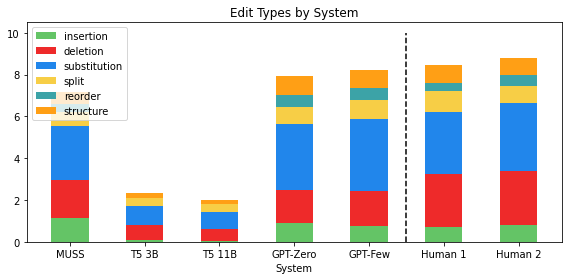

In [2]:
edit_type_by_system(data, normalized=True)

In [3]:
system_by_information_change(data, normalized=True)

TypeError: system_by_information_change() got an unexpected keyword argument 'normalized'

In [7]:
for sent in data:
    if '11B' in sent['system']:
        print(get_sent_info(sent))

kelly - Batch 9, HIT 52 (ID 122)
anton - Batch 7, HIT 7 (ID 155)
kelly - Batch 7, HIT 7 (ID 155)
vinayak - Batch 7, HIT 7 (ID 155)
anton - Batch 7, HIT 14 (ID 156)
ayush - Batch 7, HIT 7 (ID 156)
rachel - Batch 7, HIT 14 (ID 156)
anton - Batch 7, HIT 21 (ID 168)
kelly - Batch 7, HIT 21 (ID 168)
vishnesh - Batch 7, HIT 21 (ID 168)
anton - Batch 7, HIT 28 (ID 175)
ayush - Batch 7, HIT 21 (ID 175)
vishnesh - Batch 7, HIT 35 (ID 175)
anton - Batch 7, HIT 35 (ID 182)
ayush - Batch 7, HIT 35 (ID 182)
vinayak - Batch 7, HIT 35 (ID 182)
anton - Batch 7, HIT 42 (ID 189)
rachel - Batch 7, HIT 21 (ID 189)
vinayak - Batch 7, HIT 42 (ID 189)
anton - Batch 7, HIT 49 (ID 196)
ayush - Batch 7, HIT 49 (ID 196)
kelly - Batch 7, HIT 42 (ID 196)
ayush - Batch 7, HIT 14 (ID 204)
kelly - Batch 7, HIT 28 (ID 204)
vishnesh - Batch 7, HIT 28 (ID 204)
ayush - Batch 7, HIT 28 (ID 211)
vinayak - Batch 7, HIT 28 (ID 211)
vishnesh - Batch 7, HIT 42 (ID 211)
ayush - Batch 7, HIT 42 (ID 218)
kelly - Batch 7, HIT 35 (

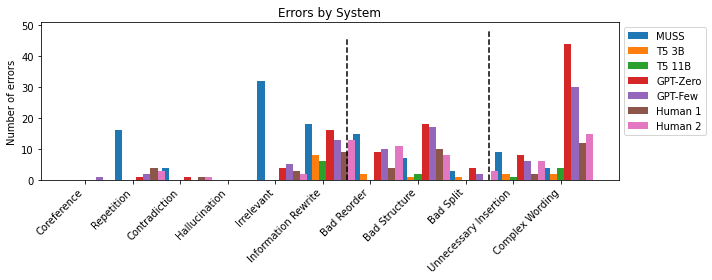

In [ ]:
errors_by_system(data)

In [ ]:
sankey_combined(data)

In [ ]:
# Print the avg. sentence scores for each system
for s in systems:
    print(f'{system_name_mapping[s]} \t {avg([sent["score"] for sent in data if sent["system"] == s])}')

GPT-Zero 	 8.07
T5 3B 	 1.28
Human 1 	 10.52
T5 11B 	 0.85
GPT-Few 	 10.1
MUSS 	 4.33
Human 2 	 11.09


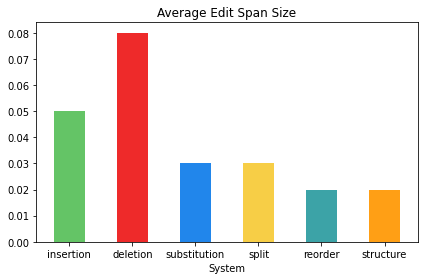

In [ ]:
annotations = [x for y in [sent['processed_annotations'] for sent in data] for x in y]
avg_span_size(annotations)

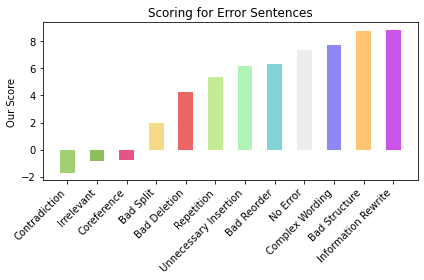

In [ ]:
class Tmp(Enum):
    NO_ERROR = 'No Error'

error_segmentation = {}
for error in Error:
    error_segmentation[error] = [sent for sent in data if any([ann['error_type'] == error for ann in sent['processed_annotations']])]
error_segmentation[Tmp.NO_ERROR] = [sent for sent in data if not any([ann['error_type'] == error for ann in sent['processed_annotations']])]

pts = []
pts += [(error, avg([s['score'] for s in error_segmentation[error]])) for error in error_segmentation.keys()]
pts = sorted([p for p in pts if p[1] != 0], key=lambda x: x[1])

fig, ax = plt.subplots(figsize=(6, 4))

cust_mapping = color_mapping
cust_mapping[Tmp.NO_ERROR] = '#ededed'

ax.bar([p[0].value for p in pts], [p[1] for p in pts], width, color=[cust_mapping[label] for label in [p[0] for p in pts]])
plt.xticks(rotation=45, ha="right")
ax.set_ylabel('Our Score')
ax.set_title('Scoring for Error Sentences')
plt.show()

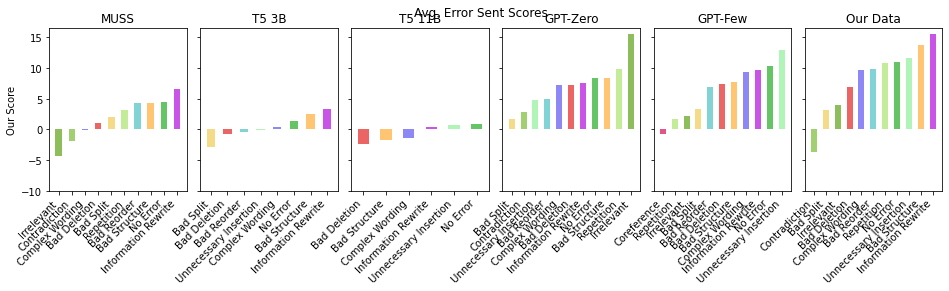

In [ ]:
class Tmp(Enum):
    NO_ERROR = 'No Error'

cust_systems = [s for s in systems if 'Human' not in s] + ['aggregated/human']

fig, ax = plt.subplots(1, len(cust_systems), figsize=(16, 3), sharey=True, gridspec_kw = {'wspace': 0.1, 'hspace':0})
for i, system in enumerate([s for s in all_system_labels if s in cust_systems]):
    selected = [sent for sent in data if sent['system'] == system]
    if system == 'aggregated/human':
        selected = [sent for sent in data if 'Human' in sent['system']]

    error_segmentation = {}
    for error in Error:
        error_segmentation[error] = [sent for sent in selected if any([ann['error_type'] == error for ann in sent['processed_annotations']])]
    error_segmentation[Tmp.NO_ERROR] = [sent for sent in selected if not any([ann['error_type'] == error for ann in sent['processed_annotations']])]

    pts = []
    pts += [(error, avg([s['score'] for s in error_segmentation[error]])) for error in error_segmentation.keys()]
    pts = sorted([p for p in pts if p[1] != 0], key=lambda x: x[1])

    cust_mapping = color_mapping
    cust_mapping[Tmp.NO_ERROR] = '#64C466'

    ax[i].bar([p[0].value for p in pts], [p[1] for p in pts], width, color=[cust_mapping[label] for label in [p[0] for p in pts]])
    ax[i].set_title(system_name_mapping[system])
    # ax[i].set_xticks([])
    ax[i].set_yticks(np.arange(-10, 16, 5))

for tick in [i for j in [x.get_xticklabels() for x in ax] for i in j]:
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')

fig.suptitle('Avg. Error Sent Scores')
ax[0].set_ylabel('Our Score')
# plt.legend([p[0].value for p in pts], loc='center left', bbox_to_anchor=(1.5, 0.5), ncol=3)
out_filename = f'img/error-scores.svg'
plt.savefig(out_filename, format="svg", bbox_inches='tight', pad_inches=0.0)
plt.show()

In [ ]:
def get_annotations_by_edit_family(data, edit_type):
    information_change = None
    if edit_type == 'paraphrase':
        family = Family.LEXICAL
        edit_type = 'substitution'
    elif edit_type == 'split' or edit_type == 'structure' or edit_type == 'reorder':
        family = Family.SYNTAX
    elif edit_type == 'elaboration' or edit_type == 'generalization':
        family = Family.CONTENT
        if edit_type == 'elaboration':
            information_change = Information.MORE
        elif edit_type == 'generalization':
            information_change = Information.LESS
    else:
        raise ValueError(f'Edit type not supported for this operation: {edit_type}')

    anns = [ann for sent in data for ann in sent['processed_annotations']]
    selected = [ann for ann in anns if ann['family'] == family and ann['edit_type'] == edit_type]
    if edit_type == 'elaboration' or edit_type == 'generalization':
        selected = [ann for ann in anns if ann['information_impact'] == information_change]

    return selected

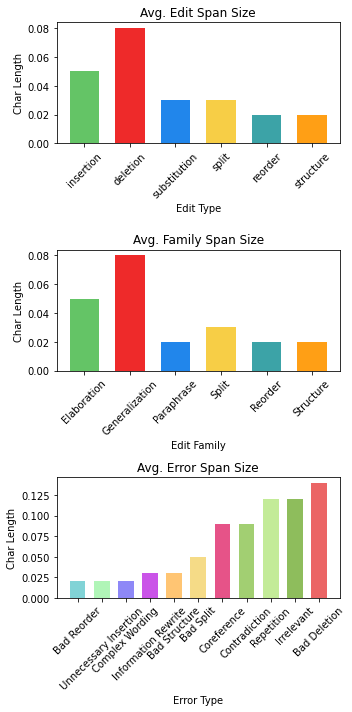

In [ ]:
families = [
    'elaboration',
    'generalization',
    'paraphrase',
    'split',
    'reorder',
    'structure',
]

class Tmp(Enum):
    NO_ERROR = 'No Error'

width = 0.65
annotations = [x for y in [sent['processed_annotations'] for sent in data] for x in y]
fig, ax = plt.subplots(3, 1, figsize=(5, 10))

edit_size = [avg([x['size'] for x in annotations if x['edit_type'] == edit_type]) for edit_type in edit_type_labels]
ax[0].bar(edit_type_labels, edit_size, width, color=[color_mapping[label] for label in edit_type_labels])

fam_size = [avg([x['size'] for x in get_annotations_by_edit_family(data, family)]) for family in families]
ax[1].bar([x.capitalize() for x in families], fam_size, width, color=[color_mapping[label] for label in families])

anns = [ann for sent in data for ann in sent['processed_annotations']]
error_segmentation = {}
for error in Error:
    error_segmentation[error] = [a for a in anns if error == a['error_type']]
error_segmentation[Tmp.NO_ERROR] = [a for a in anns if error == None]
pts = []
pts += [(error, avg([s['size'] for s in error_segmentation[error]])) for error in error_segmentation.keys()]
pts = sorted([p for p in pts if p[1] != 0], key=lambda x: x[1])
ax[2].bar([p[0].value for p in pts], [p[1] for p in pts], width, color=[color_mapping[label] for label in [p[0] for p in pts]])

ax[0].set_xlabel('Edit Type')
ax[1].set_xlabel('Edit Family')
ax[2].set_xlabel('Error Type')

ax[0].set_ylabel('Char Length')
ax[1].set_ylabel('Char Length')
ax[2].set_ylabel('Char Length')

ax[0].set_title('Avg. Edit Span Size')
ax[1].set_title('Avg. Family Span Size')
ax[2].set_title('Avg. Error Span Size')

for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels() + ax[2].get_xticklabels():
    tick.set_rotation(45)
plt.show()

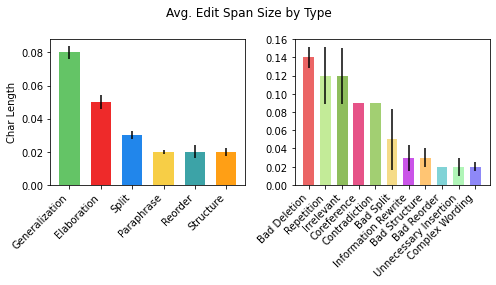

In [ ]:
families = [
    'elaboration',
    'generalization',
    'paraphrase',
    'split',
    'reorder',
    'structure',
]

class Tmp(Enum):
    NO_ERROR = 'No Error'

import scipy.stats as st
def ci(int_data):
    y1, y2 = st.t.interval(alpha=0.95, df=len(int_data)-1, loc=np.mean(int_data), scale=st.sem(int_data)) 
    # If it's too big, we just won't even return it
    if y1 <= 0.01 or math.isnan(y1):
        return 0
    return (y2-y1) / 2

width = 0.65
annotations = [x for y in [sent['processed_annotations'] for sent in data] for x in y]
fig, ax = plt.subplots(1, 2, figsize=(7, 4))

fam_size = [(family, avg([x['size'] for x in get_annotations_by_edit_family(data, family)]), ci([x['size'] for x in get_annotations_by_edit_family(data, family)])) for family in families]
pts = sorted([p for p in fam_size if p[1] != 0], key=lambda x: x[1], reverse=True)
ax[0].bar([p[0].capitalize() for p in pts], [p[1] for p in pts], width, yerr=[p[2] for p in pts], color=[color_mapping[label] for label in families])

anns = [ann for sent in data for ann in sent['processed_annotations']]
error_segmentation = {}
for error in Error:
    error_segmentation[error] = [a for a in anns if error == a['error_type']]
error_segmentation[Tmp.NO_ERROR] = [a for a in anns if error == None]
pts = [(error, avg([s['size'] for s in error_segmentation[error]]), ci([s['size'] for s in error_segmentation[error]])) for error in error_segmentation.keys()]
pts = sorted([p for p in pts if p[1] != 0], key=lambda x: x[1], reverse=True)
ax[1].bar([p[0].value for p in pts], [p[1] for p in pts], width, yerr=[p[2] for p in pts], color=[color_mapping[label] for label in [p[0] for p in pts]])

# ax[0].set_xlabel('Edit Family')
# ax[1].set_xlabel('Error Type')

ax[0].set_ylabel('Char Length')
ax[1].set_ylabel('')

plt.suptitle('Avg. Edit Span Size by Type')
# ax[1].set_title('Avg. Error Span Size')

ax[0].set_yticks(np.arange(0, 0.085, 0.02))
ax[1].set_yticks(np.arange(0, 0.17, 0.02))

for tick in ax[0].get_xticklabels() + ax[1].get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')

out_filename = f'img/edit-sizes.svg'
plt.savefig(out_filename, format="svg", bbox_inches='tight', pad_inches=0.0)
plt.show()

Loading files: ['../annotated/batch_1_anton.json', '../annotated/batch_1_ayush.json', '../annotated/batch_1_kelly.json', '../annotated/batch_2_vinayak.json', '../annotated/batch_2_vishnesh.json', '../annotated/batch_3_anton.json', '../annotated/batch_3_ayush.json', '../annotated/batch_3_kelly.json', '../annotated/batch_4_rachel.json', '../annotated/batch_4_vinayak.json', '../annotated/batch_4_vishnesh.json']

Found users: {'anton', 'ayush', 'vinayak', 'vishnesh', 'kelly', 'rachel'}

rachel - Batch 4, HIT 5 (ID 124) has 1 split edits but 0 annotations. Likely a missing annotation. Skipping edit type...
rachel - Batch 4, HIT 15 (ID 134) has 1 split edits but 0 annotations. Likely a missing annotation. Skipping edit type...
When processing sentence: rachel - Batch 4, HIT 5 (ID 124). Caught error on: Could not process edit: {'type': 'deletion', 'id': 5, 'original_span': [(95, 98)], 'simplified_span': None, 'annotation': None}. Skipping...


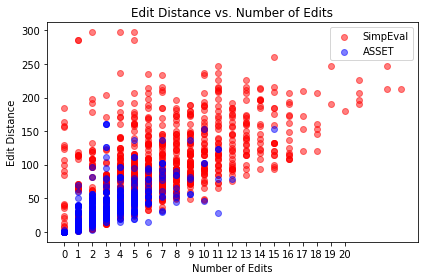

In [ ]:
asset = load_data('../annotated', batch_num=[1, 2, 3, 4], preprocess=True)

pts = []
for sent in data:
    pts += [(
        len(sent['processed_annotations']),
        edit_dist(sent['original'], sent['simplified'])
    )]
plt.scatter([p[0] for p in pts], [p[1] for p in pts], color='red', label='SimpEval', alpha=0.5)

pts = []
for sent in asset:
    pts += [(
        len(sent['processed_annotations']),
        edit_dist(sent['original'], sent['simplified'])
    )]
plt.scatter([p[0] for p in pts], [p[1] for p in pts], color='blue', label='ASSET', alpha=0.5)

plt.xticks(np.arange(0, 21, 1))

plt.title('Edit Distance vs. Number of Edits')
plt.xlabel('Number of Edits')
plt.ylabel('Edit Distance')
plt.legend()
out_filename = f'img/edit-distance-num-edits.svg'
plt.savefig(out_filename, format="svg", bbox_inches='tight', pad_inches=0.0)
plt.show()

In [ ]:
for sent in data:
    sent['ed'] = edit_dist(sent['original'], sent['simplified'])

In [ ]:
for sent in asset:
    sent['ed'] = edit_dist(sent['original'], sent['simplified'])

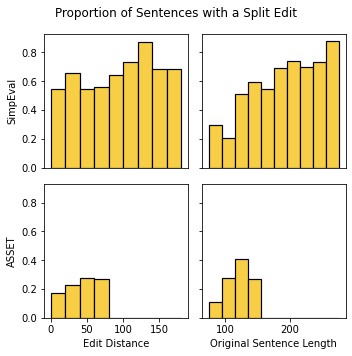

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(5, 5), sharey=True)

# If a bucket has less than this value, we don't include it
representative_sample_size = 15

for k, dataset in enumerate([data, asset]):
    bucket_size = 20
    start_amt = 0
    end_amt = 205
    pts = []
    for i in range((end_amt - start_amt) // bucket_size):
        start_size = start_amt + i * bucket_size
        end_size = start_amt + (i + 1) * bucket_size

        selected = [s for s in dataset if start_size <= s['ed'] < end_size]

        splits = 0
        for sent in selected:
            if len([a for a in sent['edits'] if a['type'] == 'split']) >= 1:
                splits += 1
        if len(selected) > representative_sample_size:
            pts += [(start_size, splits / len(selected))]
        else:
            pts += [(start_size, 0)]
    ax[k, 0].hist([p[0] for p in pts][:-1], [p[0] for p in pts], weights=[p[1] for p in pts[1:]], color=color_mapping['split'], edgecolor='black', linewidth=1.2)

    bucket_size = 20
    start_amt = 75
    end_amt = 300
    pts = []
    for i in range((end_amt - start_amt) // bucket_size):
        start_size = start_amt + i * bucket_size
        end_size = start_amt + (i + 1) * bucket_size

        selected = [s for s in dataset if start_size <= len(s['simplified']) < end_size]

        splits = 0
        for sent in selected:
            if len([a for a in sent['edits'] if a['type'] == 'split']) >= 1:
                splits += 1
        
        if len(selected) > representative_sample_size:
            pts += [(start_size, splits / len(selected))]
        else:
            pts += [(start_size, 0)]
    ax[k, 1].hist([p[0] for p in pts][:-1], [p[0] for p in pts], weights=[p[1] for p in pts[1:]], color=color_mapping['split'], edgecolor='black', linewidth=1.2)

fig.suptitle('Proportion of Sentences with a Split Edit')
ax[0, 0].set_xticks([])
ax[0, 1].set_xticks([])
ax[1, 0].set_xlabel('Edit Distance')
ax[1, 1].set_xlabel('Original Sentence Length')
ax[0, 0].set_ylabel('SimpEval')
ax[1, 0].set_ylabel('ASSET')

out_filename = f'img/split-edit-sizes.svg'
plt.savefig(out_filename, format="svg", bbox_inches='tight', pad_inches=0.0)
plt.show()

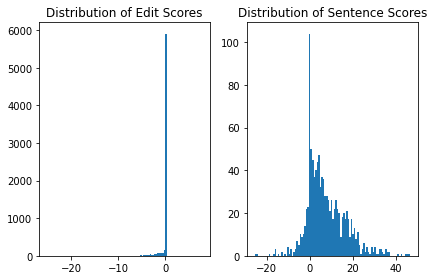

In [ ]:
# Show the distribution of edit and sentence scores
score_distribution(data)

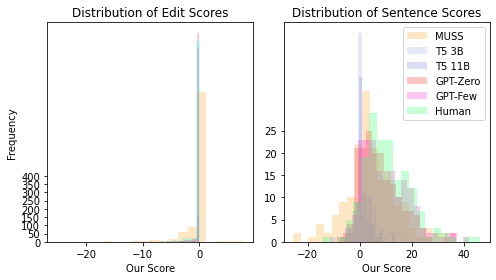

In [ ]:
import random

n_bins = 20
fig, axs = plt.subplots(1, 2, tight_layout=True, figsize=(7, 4))

for system in [s for s in all_system_labels if s in systems and 'Human' not in s]:
    annotations = sorted([x for y in [sent['processed_annotations'] for sent in data if sent['system'] == system] for x in y], key=lambda x: x['score'])
    axs[0].hist([x['score'] for x in annotations], bins=n_bins, alpha=0.3, label=system_name_mapping[system], color=color_mapping[system])
    axs[1].hist([x['score'] for x in data if x['system'] == system], bins=n_bins, alpha=0.3, label=system_name_mapping[system], color=color_mapping[system])

# Only human annotations
annotations = sorted([x for y in [sent['processed_annotations'] for sent in data if 'Human' in sent['system']] for x in y], key=lambda x: x['score'])
edit_scores, sent_scores = [x['score'] for x in annotations], [x['score'] for x in data if 'Human' in x['system']]
axs[0].hist(random.sample(edit_scores, int(len(edit_scores)/2)), bins=n_bins, alpha=0.3, label='Human', color=color_mapping['new-wiki-1/Human 1 Writing'])
axs[1].hist(random.sample(sent_scores, int(len(sent_scores)/2)), bins=n_bins, alpha=0.3, label='Human', color=color_mapping['new-wiki-1/Human 2 Writing'])

axs[0].set_yticks(np.arange(0, 401, 50))
axs[1].set_yticks(np.arange(0, 26, 5))

axs[0].set_title("Distribution of Edit Scores")
axs[1].set_title("Distribution of Sentence Scores")

axs[0].set_ylabel("Frequency")
axs[0].set_xlabel("Our Score")
axs[1].set_xlabel("Our Score")

axs[1].legend()

out_filename = f'img/score-distributions.svg'
plt.savefig(out_filename, format="svg", bbox_inches='tight', pad_inches=0.0)
plt.show()


In [ ]:
# Get the best and worst performing sentences
best, worst = best_performing(data)

Highest Scoring:
vinayak - Batch 5, HIT 33 (ID 111) - 46.413785547944784
vishnesh - Batch 6, HIT 32 (ID 130) - 45.33118134054537
vinayak - Batch 6, HIT 16 (ID 45) - 44.49183097534004
anton - Batch 5, HIT 40 (ID 39) - 42.22462881524333
vinayak - Batch 5, HIT 7 (ID 95) - 40.89500998655729

Lowest scoring:
rachel - Batch 7, HIT 9 (ID 161) - -25.677976439865404
anton - Batch 7, HIT 13 (ID 161) - -24.38384429790904
anton - Batch 5, HIT 29 (ID 28) - -18.858700167805132
anton - Batch 6, HIT 16 (ID 114) - -16.69249648750433
anton - Batch 7, HIT 25 (ID 172) - -16.24140076336377


In [ ]:
# Get setences with a score of 0
zeros = zero_scoring_sents(data)

anton - Batch 5, HIT 19 (ID 18)
ayush - Batch 5, HIT 14 (ID 18)
kelly - Batch 5, HIT 39 (ID 68)
kelly - Batch 5, HIT 40 (ID 68)
kelly - Batch 9, HIT 32 (ID 68)


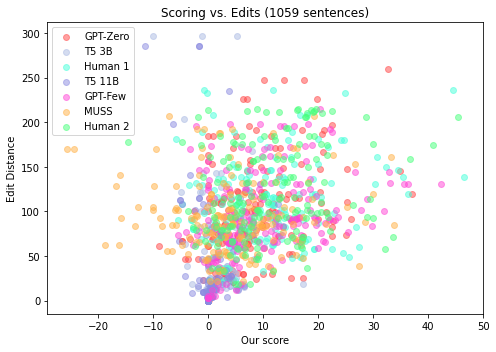

In [ ]:
# average_scores: Averages our scores before plotting
edit_length(data, systems, simpeval=False, average_scores=False)

In [ ]:
# Get sentences with at least 1 structure change from 1 annotator
ids = sorted(list(set([sent['id'] for sent in data if 'structure' in [x['type'] for x in sent['edits']]])))
print(f'Sentences with at least 1 structure change: {len(ids)} / {len(data)}')

Sentences with at least 1 structure change: 263 / 1059


anton - Batch 5, HIT 6 (ID 5)

In Marriages and Infidelities, Oates explicitly alludes to novellas and short stories by earlier writers, making use of either their titles or their themes and adapting them in accordance with her artistic intentions.
In "Marriages and Infidelities," Oates uses the titles and themes from earlier novellas and short stories and adapts them to match her own goals.

rachel - Batch 5, HIT 8 (ID 5)

In Marriages and Infidelities, Oates explicitly alludes to novellas and short stories by earlier writers, making use of either their titles or their themes and adapting them in accordance with her artistic intentions.
In "Marriages and Infidelities," Oates uses the titles and themes from earlier novellas and short stories and adapts them to match her own goals.



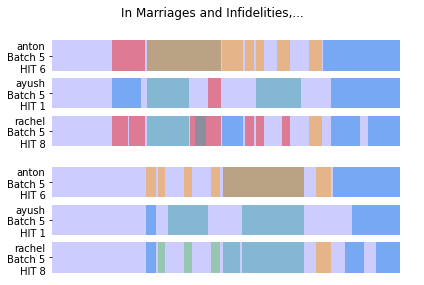

In [ ]:
# Display a sentence with a structure change
id_ = 4
sents = [sent for sent in data if sent['id'] == ids[id_]]
print_changes(sents)
draw_agreement(sents)

In [ ]:
for system in systems:
    aloe, aloe_no_del, perc_error = error_rate([sent for sent in data if system == sent['system']])
    print(f'''
    --- {system} ---
    Sentences with at least 1 error: {aloe}
    Sentences with at least 1 error excluding bad deletion: {aloe_no_del}
    Percentage of error edits: {perc_error}
    ''')


    --- new-wiki-1/GPT-3-zero-shot ---
    Sentences with at least 1 error: 0.4888888888888889
    Sentences with at least 1 error excluding bad deletion: 0.34444444444444444
    Percentage of error edits: 0.1227236737925574
    

    --- new-wiki-1/T5-3B ---
    Sentences with at least 1 error: 0.3711340206185567
    Sentences with at least 1 error excluding bad deletion: 0.14432989690721648
    Percentage of error edits: 0.22274881516587677
    

    --- new-wiki-1/Human 1 Writing ---
    Sentences with at least 1 error: 0.5029585798816568
    Sentences with at least 1 error excluding bad deletion: 0.23668639053254437
    Percentage of error edits: 0.10250391236306729
    

    --- new-wiki-1/T5-11B ---
    Sentences with at least 1 error: 0.31958762886597936
    Sentences with at least 1 error excluding bad deletion: 0.1134020618556701
    Percentage of error edits: 0.19576719576719576
    

    --- new-wiki-1/GPT-3-few-shot ---
    Sentences with at least 1 error: 0.48618784530386

In [ ]:
# What % content edits are elaboration vs generalization

# Graphs each system with 6 columns each. Each column is a different quality edit. 
# This takes the average rating of each edit

IndexError: list index out of range

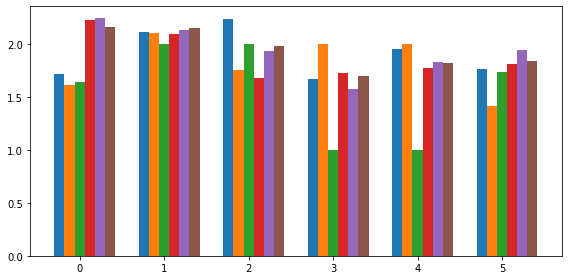

In [ ]:
avg_edit_ratings(data)

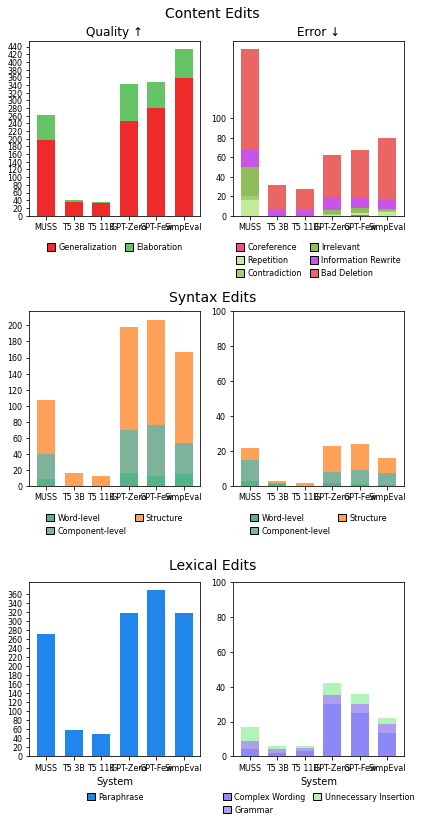

In [8]:
# Older version which combines graphs side-by-side
# edits_by_family(data)

# edits_by_family(data, Family.CONTENT)
# edits_by_family(data, Family.SYNTAX)
# edits_by_family(data, Family.LEXICAL)

edits_by_family_separated(data, savefig=True)
edits_by_family_separated(data)

In [ ]:
get_edits_by_family(data, Family.CONTENT, errors_by_sent=True)

{'new-wiki-1/GPT-3-few-shot': {'quality': {<Information.LESS: 'Generalization'>: 1.5524861878453038,
   <Information.SAME: 'Same Information'>: 0.0,
   <Information.MORE: 'Elaboration'>: 0.3701657458563536,
   <Information.DIFFERENT: 'Different Information'>: 0.0},
  'error': {<Error.COREFERENCE: 'Coreference'>: 0.0055248618784530384,
   <Error.REPETITION: 'Repetition'>: 0.011049723756906077,
   <Error.CONTRADICTION: 'Contradiction'>: 0.0,
   <Error.HALLUCINATION: 'Hallucination'>: 0.0,
   <Error.IRRELEVANT: 'Irrelevant'>: 0.027624309392265192,
   <Error.INFORMATION_REWRITE: 'Information Rewrite'>: 0.06077348066298342,
   <Error.BAD_DELETION: 'Bad Deletion'>: 0.26519337016574585,
   <Error.BAD_REORDER: 'Bad Reorder'>: 0.0,
   <Error.BAD_STRUCTURE: 'Bad Structure'>: 0.0,
   <Error.BAD_SPLIT: 'Bad Split'>: 0.0,
   <Error.UNNECESSARY_INSERTION: 'Unnecessary Insertion'>: 0.03314917127071823,
   <Error.COMPLEX_WORDING: 'Complex Wording'>: 0.0}},
 'new-wiki-1/Muss': {'quality': {<Information

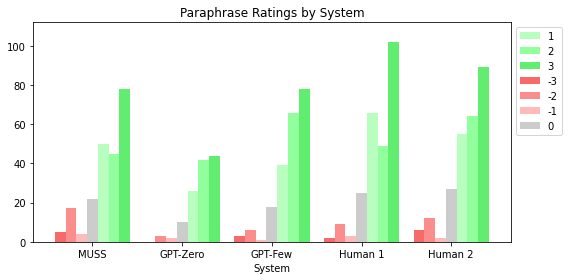

In [ ]:
ratings_by_edit_type(data, 'paraphrase')
# ratings_by_edit_type(data, 'split')
# ratings_by_edit_type(data, 'reorder')
# ratings_by_edit_type(data, 'structure')

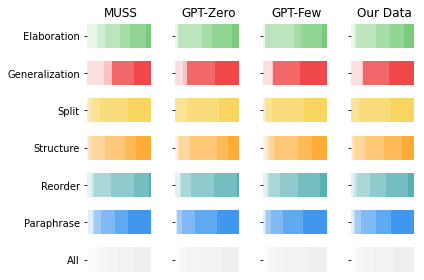

In [ ]:
edit_ratings_barh(data, old_formatting=True)

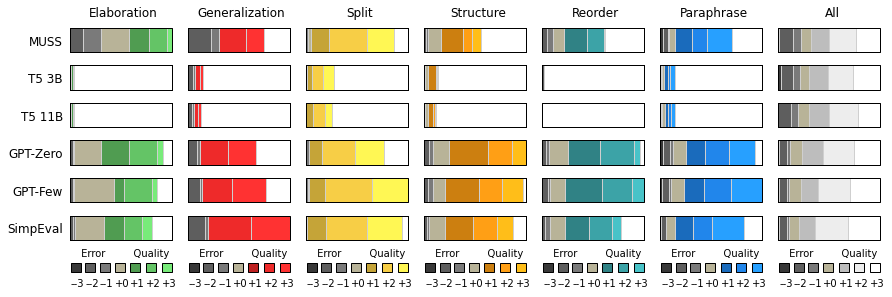

In [4]:
edit_ratings_barh(data) # include_all=False

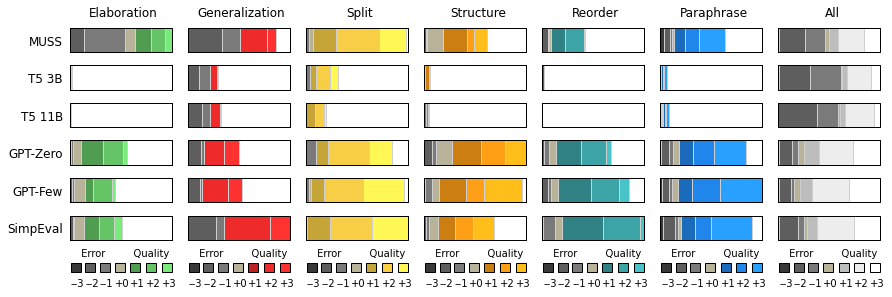

In [5]:
edit_ratings_barh(data, size_weighted=True)

In [ ]:
# Prints a table quality edits
for family in ['elaboration', 'generalization', 'split', 'structure', 'reorder', 'paraphrase']:
    ratings = get_ratings_by_edit_type(data, family)
    al = f'{family} & '
    for system in [s for s in all_system_labels if s in ratings.keys() and '2' not in s]:
        total = sum([x if type(x) is int else sum(x.values()) for x in list(ratings[system].values())])
        nl = ""
        for i in range(3):
            nl += (f'{round(ratings[system]["error"][i] / total, 2)*100:.0f} & ')
        nl += (f'{round(ratings[system]["trivial"] / total, 2)*100:.0f} & ')
        for i in range(3):
            nl += (f'{round(ratings[system]["quality"][i] / total, 2)*100:.0f} & ')
        al += nl
    al = ' & ' + al[:-2].capitalize() + '\\tabularnewline'
    print(al)

 & Elaboration & 0 & 15 & 13 & 24 & 15 & 24 & 8 & 0 & 5 & 0 & 38 & 15 & 33 & 10 & 0 & 3 & 0 & 46 & 11 & 33 & 7 & 0 & 10 & 2 & 28 & 18 & 23 & 18 \tabularnewline
 & Generalization & 0 & 27 & 12 & 0 & 0 & 34 & 27 & 0 & 13 & 5 & 0 & 0 & 44 & 38 & 0 & 14 & 2 & 0 & 0 & 41 & 42 & 0 & 17 & 3 & 0 & 0 & 41 & 39 \tabularnewline
 & Split & 0 & 0 & 2 & 4 & 15 & 43 & 36 & 0 & 0 & 0 & 0 & 20 & 49 & 31 & 0 & 0 & 3 & 0 & 11 & 51 & 35 & 0 & 0 & 0 & 0 & 16 & 46 & 38 \tabularnewline
 & Structure & 0 & 2 & 4 & 23 & 31 & 17 & 23 & 0 & 4 & 2 & 17 & 42 & 19 & 16 & 0 & 6 & 4 & 9 & 37 & 22 & 23 & 0 & 3 & 1 & 16 & 29 & 38 & 13 \tabularnewline
 & Reorder & 0 & 9 & 3 & 26 & 37 & 23 & 3 & 0 & 8 & 3 & 15 & 36 & 36 & 3 & 0 & 6 & 4 & 16 & 29 & 35 & 10 & 0 & 3 & 3 & 37 & 30 & 20 & 7 \tabularnewline
 & Paraphrase & 2 & 8 & 2 & 10 & 23 & 20 & 35 & 2 & 2 & 0 & 8 & 20 & 33 & 35 & 0 & 3 & 1 & 9 & 18 & 31 & 37 & 1 & 4 & 1 & 10 & 26 & 19 & 40 \tabularnewline


In [ ]:
# - Average quality edit (or log-size * average) rating for these modification types
#     - Content, Syntax, Lexical
#     - Elaboration, Generalization, Paraphrase, Structure, Reorder, Split
# - Average error edit for Content, Syntax, Lexical i guess?
# - Overlap the annotator’s decision for each system

Loading files: ['../annotated/batch_1_anton.json', '../annotated/batch_1_ayush.json', '../annotated/batch_1_kelly.json', '../annotated/batch_2_vinayak.json', '../annotated/batch_2_vishnesh.json', '../annotated/batch_3_anton.json', '../annotated/batch_3_ayush.json', '../annotated/batch_3_kelly.json', '../annotated/batch_4_rachel.json', '../annotated/batch_4_vinayak.json', '../annotated/batch_4_vishnesh.json', '../annotated/batch_5_anton.json', '../annotated/batch_5_ayush.json', '../annotated/batch_5_kelly.json', '../annotated/batch_5_rachel.json', '../annotated/batch_5_vinayak.json', '../annotated/batch_5_vishnesh.json', '../annotated/batch_6_anton.json', '../annotated/batch_6_ayush.json', '../annotated/batch_6_kelly.json', '../annotated/batch_6_rachel.json', '../annotated/batch_6_vinayak.json', '../annotated/batch_6_vishnesh.json']

Found users: {'ayush', 'anton', 'vishnesh', 'kelly', 'vinayak', 'rachel'}

rachel - Batch 4, HIT 5 (ID 124) has 1 split edits but 0 annotations. Likely a m

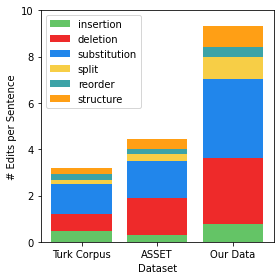

In [ ]:
all_data = load_data('../annotated', preprocess=True)
edit_type_by_system(all_data, humans=True, normalized=True)

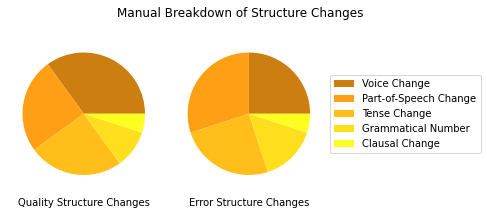

In [ ]:
subtypes = [
    'Voice Change',
    'Part-of-Speech Change',
    'Tense Change',
    'Grammatical Number',
    'Clausal Change'
]

fig, axs = plt.subplots(1, 2, figsize=(7, 3))
quality = np.array([35, 25, 25, 10, 5])
error = np.array([25, 30, 25, 15, 5])

color = color_mapping['structure']
scalar = [0.8, 1, 1.2, 1.4, 1.6]
colors = []
for s in scalar:
    colors += [colorscale(color, s)]

axs[0].pie(quality, colors=colors, labels=subtypes, labeldistance=None)
axs[1].pie(error, colors=colors, labels=subtypes, labeldistance=None)

axs[0].set_xlabel('Quality Structure Changes')
axs[1].set_xlabel('Error Structure Changes')
axs[1].legend(subtypes, loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle("Manual Breakdown of Structure Changes")

out_filename = "img/structure-breakdown.svg"
plt.savefig(out_filename, format="svg", bbox_inches='tight', pad_inches=0.0)
plt.show() 

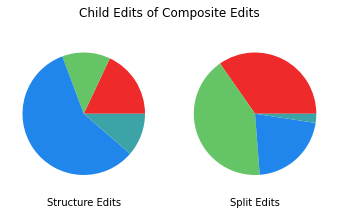

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(5, 3))

labels, values = zip(*count_dataset_composite_edits(data, 'structure').items())
axs[0].pie(values, colors=[color_mapping[l] for l in labels], labels=labels, labeldistance=None)

labels, values = zip(*count_dataset_composite_edits(data, 'split').items())
axs[1].pie(values, colors=[color_mapping[l] for l in labels], labels=labels, labeldistance=None)

axs[0].set_xlabel('Structure Edits')
axs[1].set_xlabel('Split Edits')
plt.suptitle("Child Edits of Composite Edits")

out_filename = "img/composite-breakdown.svg"
plt.savefig(out_filename, format="svg", bbox_inches='tight', pad_inches=0.0)
plt.show() 